EDA for blackout data 

- capture a correalation between outage frequency and climate data - eg. seasonality in outages

- (likes: seasonal charts x-axis jan - dec )

In [1]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import geopandas as gpd

# import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 1000

plt.style.use('seaborn-darkgrid')

In [3]:
# input dir
# change to current directory of this notebook


input_dir = '../../data'
# df_blackout = pd.read_csv(os.path.join(input_dir, 'df_blackout.csv'))

# output dir
output_dir = '../plots'
# output_file = os.path.join(output_dir, 'EDA_blackout.csv')

In [77]:
df_blackout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7280406 entries, 0 to 7280405
Data columns (total 3 columns):
 #   Column        Dtype  
---  ------        -----  
 0   hour          object 
 1   pct_blackout  float64
 2   station_id    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 166.6+ MB


In [78]:
# check for missing values
df_blackout.isnull().sum()

hour            0
pct_blackout    0
station_id      0
dtype: int64

In [79]:
# check for duplicates
df_blackout.duplicated().sum()

0

In [80]:
df_blackout.rename(columns={'hour': 'datetime'}, inplace=True)

df_blackout['datetime'] = pd.to_datetime(df_blackout['datetime'])

In [81]:

df_blackout['year'] = pd.to_datetime(df_blackout['datetime']).dt.year
df_blackout['month'] = pd.to_datetime(df_blackout['datetime']).dt.month
df_blackout['day'] = pd.to_datetime(df_blackout['datetime']).dt.day
df_blackout['hour'] = pd.to_datetime(df_blackout['datetime']).dt.hour


In [82]:

df_blackout.head()
print(df_blackout.describe())

       pct_blackout    station_id          year         month           day  \
count  7.280406e+06  7.280406e+06  7.280406e+06  7.280406e+06  7.280406e+06   
mean   1.023182e-01  3.031134e+02  2.017355e+03  6.701509e+00  1.576517e+01   
std    2.744799e-01  1.720610e+02  1.795107e+00  3.464773e+00  8.798179e+00   
min    0.000000e+00  1.000000e+00  2.014000e+03  1.000000e+00  1.000000e+00   
25%    0.000000e+00  1.580000e+02  2.016000e+03  4.000000e+00  8.000000e+00   
50%    0.000000e+00  3.040000e+02  2.017000e+03  7.000000e+00  1.600000e+01   
75%    0.000000e+00  4.640000e+02  2.018000e+03  1.000000e+01  2.300000e+01   
max    1.000000e+00  5.710000e+02  2.023000e+03  1.200000e+01  3.100000e+01   

               hour  
count  7.280406e+06  
mean   1.149182e+01  
std    6.922512e+00  
min    0.000000e+00  
25%    5.000000e+00  
50%    1.100000e+01  
75%    1.700000e+01  
max    2.300000e+01  


In [83]:
## 1 Distribution of Blackout Pecentage

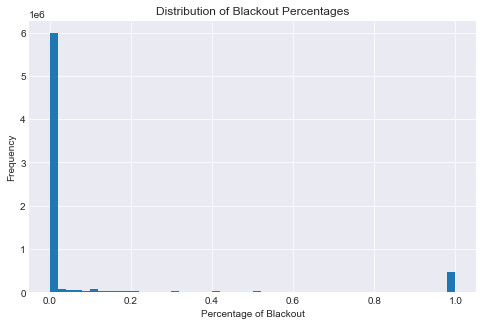

In [84]:
# Histogram of blackout percentage
plt.figure(figsize=(8, 5))
df_blackout['pct_blackout'].hist(bins=50)
plt.title('Distribution of Blackout Percentages')
plt.xlabel('Percentage of Blackout')
plt.ylabel('Frequency')
plt.grid(True)

plt.savefig(os.path.join(output_dir, 'hist_blackout_percentage.png'), dpi=600)

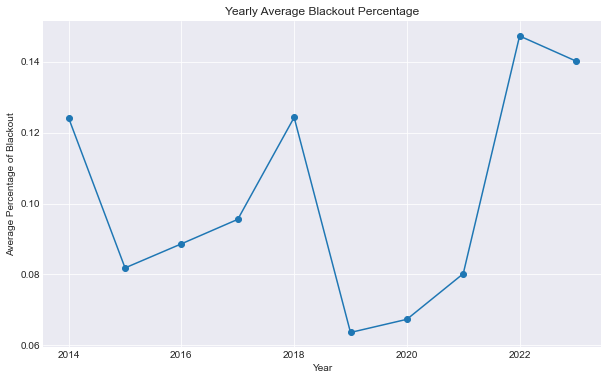

In [85]:
# Yearly trend
df_blackout.groupby('year')['pct_blackout'].mean().plot(
    kind='line', marker='o', figsize=(10, 6))
plt.title('Yearly Average Blackout Percentage')
plt.xlabel('Year')
plt.ylabel('Average Percentage of Blackout')
plt.grid(True)

plt.savefig(os.path.join(output_dir, 'yearly_blackout_percentage.png'), dpi=600)


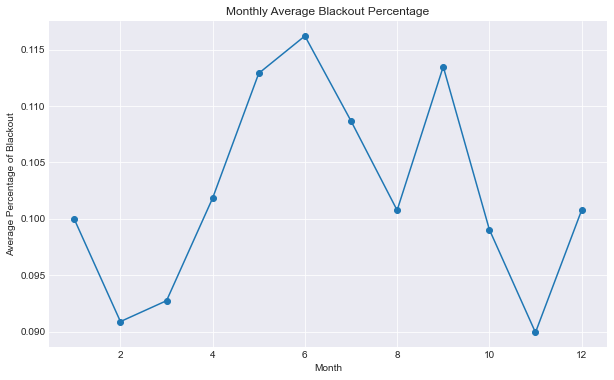

In [86]:

# Monthly trend
df_blackout.groupby('month')['pct_blackout'].mean().plot(
    kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Average Blackout Percentage')
plt.xlabel('Month')
plt.ylabel('Average Percentage of Blackout')
plt.grid(True)

plt.savefig(os.path.join(output_dir, 'monthly_blackout_percentage.png'), dpi=600)

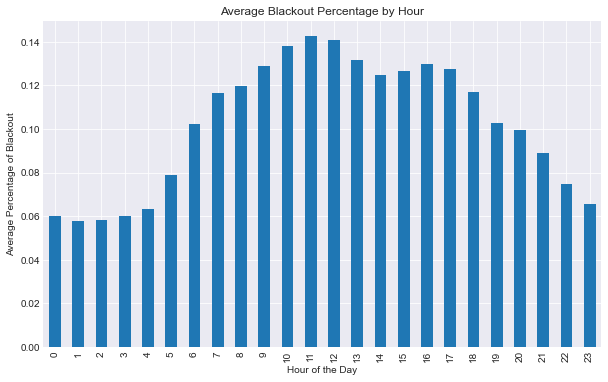

In [87]:
# Average blackout percentage by hour
df_blackout.groupby('hour')['pct_blackout'].mean().plot(kind='bar', figsize=(10, 6))
plt.title('Average Blackout Percentage by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Percentage of Blackout')
plt.grid(True)

plt.savefig(os.path.join(output_dir, 'hourly_blackout_percentage.png'), dpi=600)

In [88]:

df_blackout.set_index('datetime', inplace=True)

In [89]:
df_blackout.info()

df_blackout.index

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7280406 entries, 2015-10-08 00:00:00 to 2018-02-21 07:00:00
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pct_blackout  float64
 1   station_id    int64  
 2   year          int64  
 3   month         int64  
 4   day           int64  
 5   hour          int64  
dtypes: float64(1), int64(5)
memory usage: 388.8 MB


DatetimeIndex(['2015-10-08 00:00:00', '2015-10-08 01:00:00',
               '2015-10-08 02:00:00', '2015-10-08 03:00:00',
               '2015-10-08 04:00:00', '2015-10-08 05:00:00',
               '2015-10-08 06:00:00', '2015-10-08 07:00:00',
               '2015-10-08 08:00:00', '2015-10-08 09:00:00',
               ...
               '2018-02-15 21:00:00', '2018-02-15 22:00:00',
               '2018-02-21 00:00:00', '2018-02-21 01:00:00',
               '2018-02-21 02:00:00', '2018-02-21 03:00:00',
               '2018-02-21 04:00:00', '2018-02-21 05:00:00',
               '2018-02-21 06:00:00', '2018-02-21 07:00:00'],
              dtype='datetime64[ns]', name='datetime', length=7280406, freq=None)

## 4 Time Series Analysis

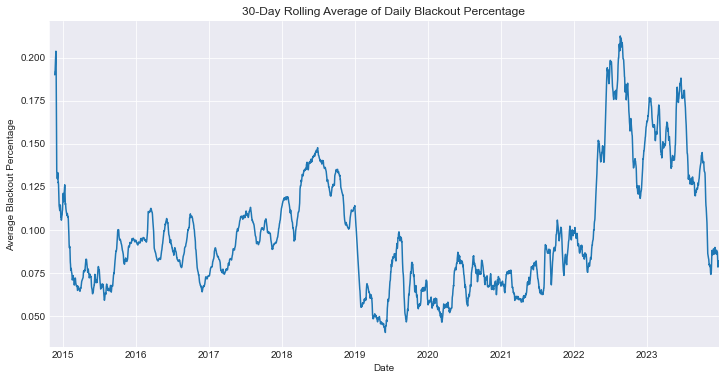

In [90]:
# df_blackout.info()
# df_blackout.set_index('datetime', inplace=True)

# Resample to daily average blackout percentage
daily_avg_blackout = df_blackout['pct_blackout'].resample('D').mean()

# Plot the rolling mean for trend analysis
daily_avg_blackout.rolling(window=30).mean().plot(figsize=(12, 6))
plt.title('30-Day Rolling Average of Daily Blackout Percentage')
plt.xlabel('Date')
plt.ylabel('Average Blackout Percentage')
plt.grid(True)

# Save the plot
plt.savefig(os.path.join(output_dir, 'time_series_30days_rolling_avg_blackout_percentage.png'), dpi=600)



### Mapping


In [92]:

# Load geospatial data with station coordinates
# read the geospatial data(geojson) with gpd
geo_df = gpd.read_file(os.path.join(input_dir, 'STATION.geojson'))

# join the geospatial data with the blackout data
df_blackout_geo = pd.merge(df_blackout, geo_df, on='station_id', how='left')

df_blackout_geo.head()
df_blackout_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7280406 entries, 0 to 7280405
Data columns (total 16 columns):
 #   Column             Dtype   
---  ------             -----   
 0   pct_blackout       float64 
 1   station_id         int64   
 2   year               int64   
 3   month              int64   
 4   day                int64   
 5   hour               int64   
 6   Location name      object  
 7   ESMI_ID            float64 
 8   Category           object  
 9   Connection Type    object  
 10  Lat                float64 
 11  Lon                float64 
 12  climate_zone_DN    float64 
 13  climate_zone_name  object  
 14  climate_zone_code  object  
 15  geometry           geometry
dtypes: float64(5), geometry(1), int64(5), object(5)
memory usage: 944.3+ MB


In [ ]:
# base map: india polygon
india_gdf = gpd.read_file(
    '../../data/helper/Indian_Climate_Zone(dissolved).geojson')


In [ ]:
# Plot the station with the average blackout percentage as color on map
# calculate average blackout percentage by station
station_avg_blackout = df_blackout_geo.groupby(
	'station_id')['pct_blackout'].mean().reset_index()

station_avg_blackout.head()

# merge the average blackout percentage with the geospatial data
geo_df = pd.merge(geo_df, station_avg_blackout, on='station_id', how='left')


In [ ]:

# Load geospatial data with station coordinates
# read the geospatial data(geojson) with gpd
geo_df = gpd.read_file(os.path.join(input_dir, 'STATION.geojson'))

# join the geospatial data with the blackout data
df_blackout_geo = pd.merge(df_blackout, geo_df, on='station_id', how='left')

df_blackout_geo.head()
df_blackout_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7280406 entries, 0 to 7280405
Data columns (total 16 columns):
 #   Column             Dtype   
---  ------             -----   
 0   pct_blackout       float64 
 1   station_id         int64   
 2   year               int64   
 3   month              int64   
 4   day                int64   
 5   hour               int64   
 6   Location name      object  
 7   ESMI_ID            float64 
 8   Category           object  
 9   Connection Type    object  
 10  Lat                float64 
 11  Lon                float64 
 12  climate_zone_DN    float64 
 13  climate_zone_name  object  
 14  climate_zone_code  object  
 15  geometry           geometry
dtypes: float64(5), geometry(1), int64(5), object(5)
memory usage: 944.3+ MB


In [ ]:
# base map: india polygon
india_gdf = gpd.read_file(
    '../../data/helper/Indian_Climate_Zone(dissolved).geojson')


In [ ]:
# Plot the station with the average blackout percentage as color on map
# calculate average blackout percentage by station
station_avg_blackout = df_blackout_geo.groupby(
	'station_id')['pct_blackout'].mean().reset_index()

station_avg_blackout.head()

# merge the average blackout percentage with the geospatial data
geo_df = pd.merge(geo_df, station_avg_blackout, on='station_id', how='left')


/var/folders/38/ttqg2y215g16g2ng7jd502_c0000gn/T/ipykernel_77932/190233317.py:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'pct_blackout_y'} in the result is deprecated and will raise a MergeError in a future version.
  top5_stations = pd.merge(top5_stations, geo_df, on='station_id', how='left')


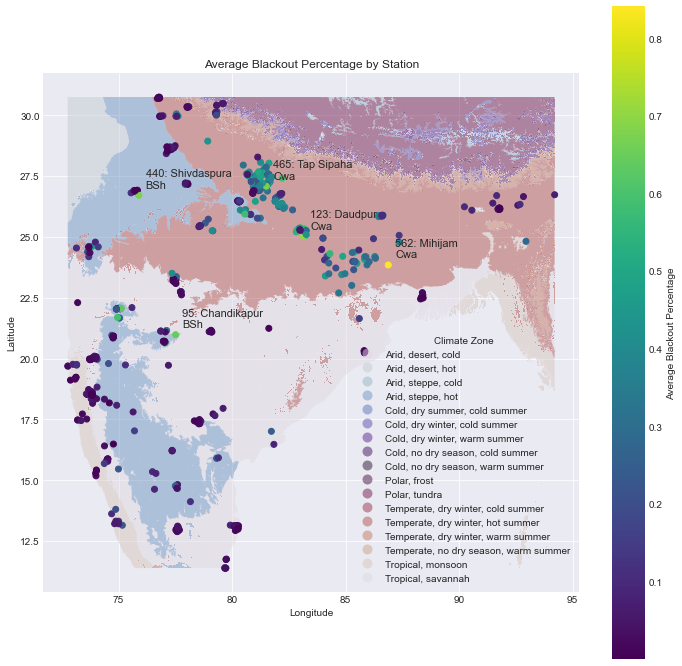

In [120]:

fig, ax = plt.subplots(figsize=(12, 12))


india_gdf.plot(column='name_climate', legend_kwds={
               'title': 'Climate Zone'}, cmap='twilight', ax=ax, legend=True, alpha=0.5)

geo_df.plot(column='pct_blackout', ax=ax, legend=True, cmap='viridis',
            legend_kwds={'label': "Average Blackout Percentage"})

plt.title('Average Blackout Percentage by Station')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# add the top 5 stations with highest blackout percentage, add the station name and id to the plot
top5_stations = df_blackout_geo.groupby('station_id')['pct_blackout'].mean().nlargest(5).reset_index()
top5_stations = pd.merge(top5_stations, geo_df, on='station_id', how='left')

for i in range(top5_stations.shape[0]):
    plt.text(top5_stations['Lon'][i] + 0.3, top5_stations['Lat'][i] + 0.3, f"{top5_stations['station_id'][i]}: {top5_stations['Location name'][i]}\n{top5_stations['climate_zone_code'][i]}",
             fontsize=11, ha='left')
    

plt.savefig(os.path.join(output_dir, 'map_blackout_percentage.png'), dpi=600)

In [121]:
top5_stations.head()

,station_id,pct_blackout_x,Location name,ESMI_ID,Category,Connection Type,Lat,Lon,climate_zone_DN,climate_zone_name,climate_zone_code,geometry,pct_blackout_x,pct_blackout_y,pct_blackout_x,pct_blackout_y,pct_blackout_x,pct_blackout_y,pct_blackout_y
0,562,0.841157,Mihijam,899.0,None,None,23.848367,86.877524,11.0,"Temperate, dry winter, hot summer",Cwa,POINT (86.87752 23.84837),0.841157,0.841157,0.841157,0.841157,0.841157,0.841157,0.841157
1,123,0.711835,Daudpur,NaN,Gram Panchayat,Domestic,25.030930,83.142728,11.0,"Temperate, dry winter, hot summer",Cwa,POINT (83.14273 25.03093),0.711835,0.711835,0.711835,0.711835,0.711835,0.711835,0.711835
2,440,0.674794,Shivdaspura,NaN,Gram Panchayat,Non Domestic,26.709301,75.895867,6.0,"Arid, steppe, hot",BSh,POINT (75.89587 26.70930),0.674794,0.674794,0.674794,0.674794,0.674794,0.674794,0.674794
3,465,0.671759,Tap Sipaha,NaN,Gram Panchayat,Domestic,27.083844,81.505952,11.0,"Temperate, dry winter, hot summer",Cwa,POINT (81.50595 27.08384),0.671759,0.671759,0.671759,0.671759,0.671759,0.671759,0.671759
4,95,0.645684,Chandikapur,NaN,Gram Panchayat,Agriculture,20.983001,77.507814,6.0,"Arid, steppe, hot",BSh,POINT (77.50781 20.98300),0.645684,0.645684,0.645684,0.645684,0.645684,0.645684,0.645684


In [127]:

# geo_df.drop(columns=['pct_blackout_x', 'pct_blackout_y'], inplace=True)
geo_df.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 538 entries, 0 to 537
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   station_id         538 non-null    int64   
 1   Location name      538 non-null    object  
 2   ESMI_ID            45 non-null     float64 
 3   Category           510 non-null    object  
 4   Connection Type    509 non-null    object  
 5   Lat                538 non-null    float64 
 6   Lon                538 non-null    float64 
 7   climate_zone_DN    535 non-null    float64 
 8   climate_zone_name  535 non-null    object  
 9   climate_zone_code  535 non-null    object  
 10  geometry           538 non-null    geometry
 11  pct_blackout       536 non-null    float64 
dtypes: float64(5), geometry(1), int64(1), object(5)
memory usage: 54.6+ KB


In [135]:

# check correlation between blackout percentage and climate zone

# One-hot encoding for climate zone

geo_df_cor = geo_df.drop(columns=['ESMI_ID', 'climate_zone_DN'])
geo_df_cor.head()


,station_id,Location name,Category,Connection Type,Lat,Lon,climate_zone_name,geometry,pct_blackout,climate_zone_code_Am,climate_zone_code_Aw,climate_zone_code_BSh,climate_zone_code_Cwa,climate_zone_code_Cwb,climate_zone_code_Dwb
0,1,5th phase JP Nagar,State Capital,Domestic,12.901092,77.589150,"Tropical, savannah",POINT (77.58915 12.90109),0.141416,0,1,0,0,0,0
1,4,Adgaon,Gram Panchayat,Domestic,20.037184,73.850136,"Tropical, savannah",POINT (73.85014 20.03718),0.022502,0,1,0,0,0,0
2,10,Akoli Jehangir,Gram Panchayat,Domestic,21.154837,77.118466,"Tropical, savannah",POINT (77.11847 21.15484),0.283676,0,1,0,0,0,0
3,11,Akot,Other Municipal Area,Domestic,21.095987,77.054704,"Tropical, savannah",POINT (77.05470 21.09599),0.029545,0,1,0,0,0,0
4,13,Alandur,State Capital,Domestic,13.000882,80.199303,"Tropical, savannah",POINT (80.19930 13.00088),0.025166,0,1,0,0,0,0


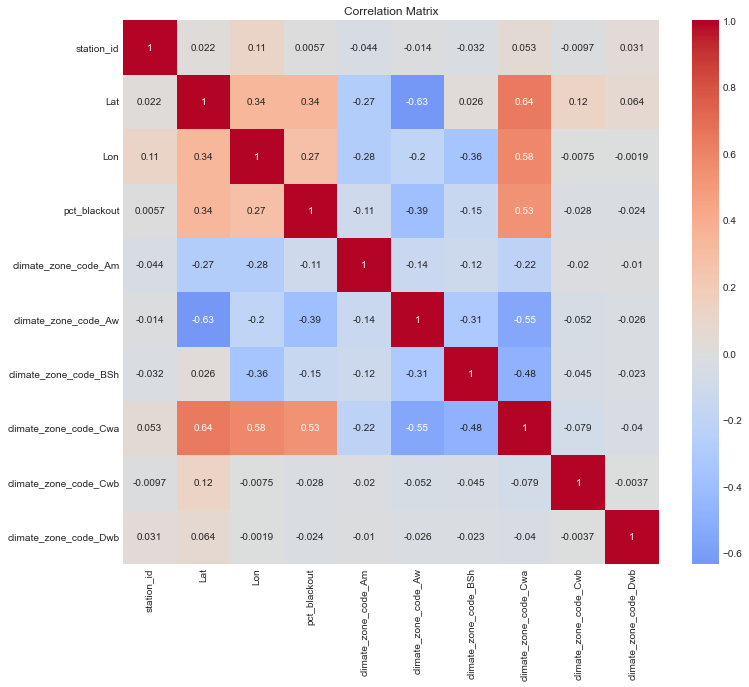

In [136]:



# Correlation matrix
correlation_matrix = geo_df_cor.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')

plt.savefig(os.path.join(output_dir, 'correlation_matrix_blackout_climate_zone.png'), dpi=600)

In [ ]:


# Correlation matrix
correlation_matrix = geo_df_cor.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')

plt.savefig(os.path.join(
    output_dir, 'correlation_matrix_blackout_climate_zone.png'), dpi=600)

In [14]:


# Correlation matrix
correlation_matrix = geo_df_cor.corr(method='spearman')

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')

plt.savefig(os.path.join(
    output_dir, 'correlation_matrix_blackout_climate_zone_spearman.png'), dpi=600)

NameError: name 'geo_df_cor' is not defined

# todo:

1. time series analysis: more plots, explain 30 days avg

2. eda in final inner join df: correlation matrix

3. add notebook7 to github

4. update ppt slides




In [54]:

input_dir = '../../data/final'

df_final = pd.read_csv(os.path.join(input_dir, 'df_merged_inner.csv'))


/var/folders/38/ttqg2y215g16g2ng7jd502_c0000gn/T/ipykernel_2789/2849006548.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv(os.path.join(input_dir, 'df_merged_inner.csv'))


In [55]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7280406 entries, 0 to 7280405
Data columns (total 18 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Unnamed: 0       int64  
 1   datetime         object 
 2   Location name    object 
 3   ESMI_ID          float64
 4   District         object 
 5   State            object 
 6   Category         object 
 7   Connection Type  object 
 8   Lat              float64
 9   Lon              float64
 10  t2m              float64
 11  u10              float64
 12  v10              float64
 13  tp               float64
 14  date             int64  
 15  time             int64  
 16  station_id       int64  
 17  pct_blackout     float64
dtypes: float64(8), int64(4), object(6)
memory usage: 999.8+ MB


In [59]:
df_final.head()
# check for missing values in t2m, tp, and blackout percentage
df_final[['t2m', 'tp', 'pct_blackout']].isnull().sum()

# print the sampled rows with missing values

# select the station_id with missing t2m

df_final[df_final['t2m'].isnull()]['station_id'].unique()


# df_final[df_final['t2m'].isnull()].head()

# calculate the average blackout percentage by station 

array([450, 156, 536, 546, 159, 328, 461, 160])

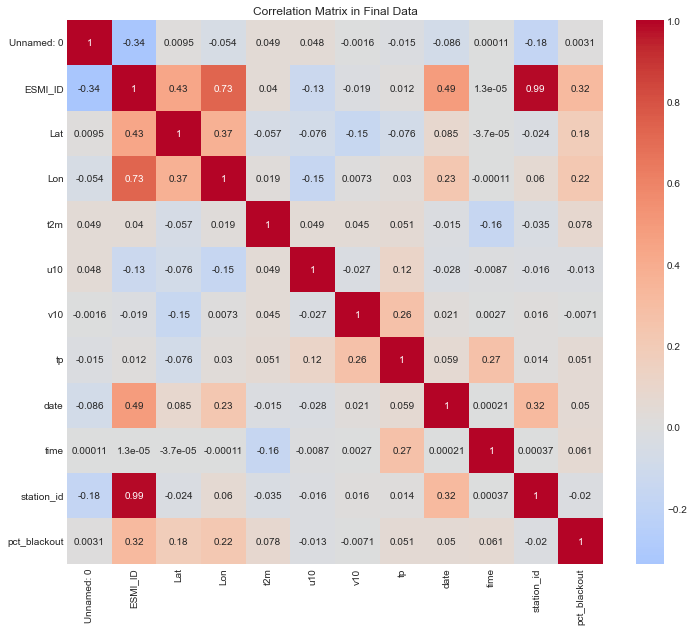

In [22]:
# check correlation between blackout percentage and climate zone

# One-hot encoding for climate zone in df_final data

plt.style.use('seaborn-darkgrid')

df_final_cor = df_final.copy()
# drop(columns=['ESMI_ID', 'climate_zone_DN'])
df_final_cor.head()

# Correlation matrix
correlation_matrix = df_final_cor.corr(method='spearman')

# Plotting the heatmap
plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)


plt.title('Correlation Matrix in Final Data')

plt.savefig('correlation_matrix_blackout_climate_zone_final.png', dpi=600)

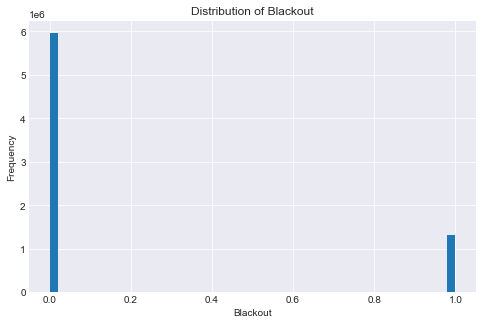

In [24]:
# add a column for blackout, if percentage is 0, then 0, else 1
df_final['blackout'] = np.where(df_final['pct_blackout'] > 0, 1, 0)

df_final.head()

# plot the distribution of blackout
plt.figure(figsize=(8, 5))

df_final['blackout'].hist(bins=50)
plt.title('Distribution of Blackout')

plt.xlabel('Blackout')
plt.ylabel('Frequency')

plt.grid(True)

plt.savefig('hist_blackout.png', dpi=600)


In [27]:
# only analyze the data with blackout
df_final_blackout = df_final[df_final['blackout'] == 1]

df_final_blackout.head()

df_final_blackout.info()
# add a new column for wind speed, the absolute value of wind speed(from u10 and v10)
df_final_blackout['wind_speed'] = np.sqrt(
	df_final_blackout['u10']**2 + df_final_blackout['v10']**2)

df_final_blackout.head()

# add a new column for v10 and u10 absolute value
df_final_blackout['v10_abs'] = np.abs(df_final_blackout['v10'])
df_final_blackout['u10_abs'] = np.abs(df_final_blackout['u10'])

df_final_blackout.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1327570 entries, 43 to 7280402
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1327570 non-null  int64  
 1   datetime         1327570 non-null  object 
 2   Location name    1327570 non-null  object 
 3   ESMI_ID          178793 non-null   float64
 4   District         1327570 non-null  object 
 5   State            1327570 non-null  object 
 6   Category         1240119 non-null  object 
 7   Connection Type  1239564 non-null  object 
 8   Lat              1327570 non-null  float64
 9   Lon              1327570 non-null  float64
 10  t2m              1322951 non-null  float64
 11  u10              1322951 non-null  float64
 12  v10              1322951 non-null  float64
 13  tp               1322951 non-null  float64
 14  date             1327570 non-null  int64  
 15  time             1327570 non-null  int64  
 16  station_id       

/var/folders/38/ttqg2y215g16g2ng7jd502_c0000gn/T/ipykernel_2789/653994432.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_blackout['wind_speed'] = np.sqrt(
/var/folders/38/ttqg2y215g16g2ng7jd502_c0000gn/T/ipykernel_2789/653994432.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_blackout['v10_abs'] = np.abs(df_final_blackout['v10'])
/var/folders/38/ttqg2y215g16g2ng7jd502_c0000gn/T/ipykernel_2789/653994432.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,Unnamed: 0,datetime,Location name,ESMI_ID,District,State,Category,Connection Type,Lat,Lon,t2m,u10,v10,tp,date,time,station_id,pct_blackout,blackout,wind_speed,v10_abs,u10_abs
43,43,2014-11-17 04:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,298.97590,-1.307119,-0.321016,0.000000,20141117,400,495,0.033333,1,1.345962,0.321016,1.307119
74,74,2014-11-10 05:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,296.66022,-2.669260,-0.194406,0.000349,20141110,500,495,0.100000,1,2.676330,0.194406,2.669260
93,93,2014-11-23 09:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,301.57250,-2.013840,-1.266154,0.000002,20141123,900,495,0.200000,1,2.378802,1.266154,2.013840
108,108,2014-11-26 07:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,300.13306,-2.502718,-2.134207,0.000000,20141126,700,495,0.016667,1,3.289139,2.134207,2.502718
138,138,2014-11-25 12:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,298.03387,-2.178747,-0.930192,0.000000,20141125,1200,495,0.116667,1,2.369007,0.930192,2.178747


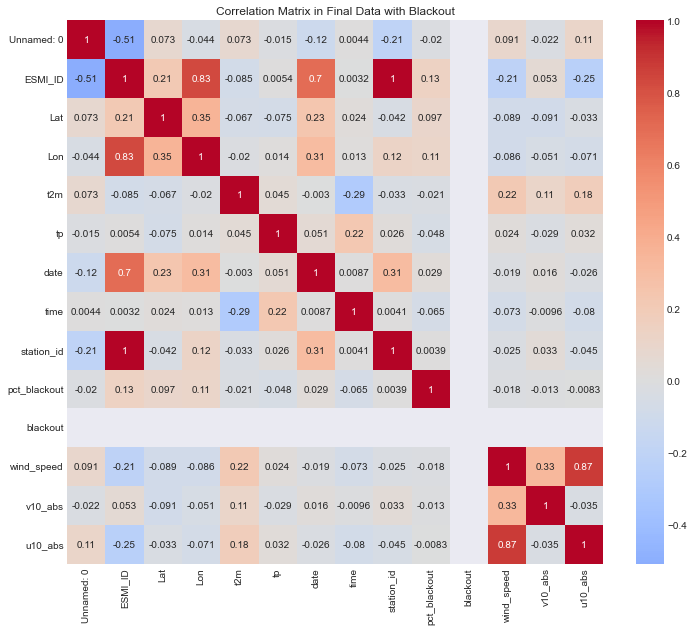

In [29]:

# Correlation matrix
# drop columns that are not needed for correlation analysis: u10, v10

df_final_blackout_cor = df_final_blackout.drop(columns=['u10', 'v10'])
correlation_matrix = df_final_blackout_cor.corr(method='spearman')

# Plotting the heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix in Final Data with Blackout')
plt.savefig('correlation_matrix_blackout_climate_zone_final_blackout.png', dpi=600)

In [35]:
df_final_blackout.head()

,Unnamed: 0,datetime,Location name,ESMI_ID,District,State,Category,Connection Type,Lat,Lon,t2m,u10,v10,tp,date,time,station_id,pct_blackout,blackout,wind_speed,v10_abs,u10_abs
43,43,2014-11-17 04:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,298.97590,-1.307119,-0.321016,0.000000,20141117,400,495,0.033333,1,1.345962,0.321016,1.307119
74,74,2014-11-10 05:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,296.66022,-2.669260,-0.194406,0.000349,20141110,500,495,0.100000,1,2.676330,0.194406,2.669260
93,93,2014-11-23 09:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,301.57250,-2.013840,-1.266154,0.000002,20141123,900,495,0.200000,1,2.378802,1.266154,2.013840
108,108,2014-11-26 07:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,300.13306,-2.502718,-2.134207,0.000000,20141126,700,495,0.016667,1,3.289139,2.134207,2.502718
138,138,2014-11-25 12:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,298.03387,-2.178747,-0.930192,0.000000,20141125,1200,495,0.116667,1,2.369007,0.930192,2.178747


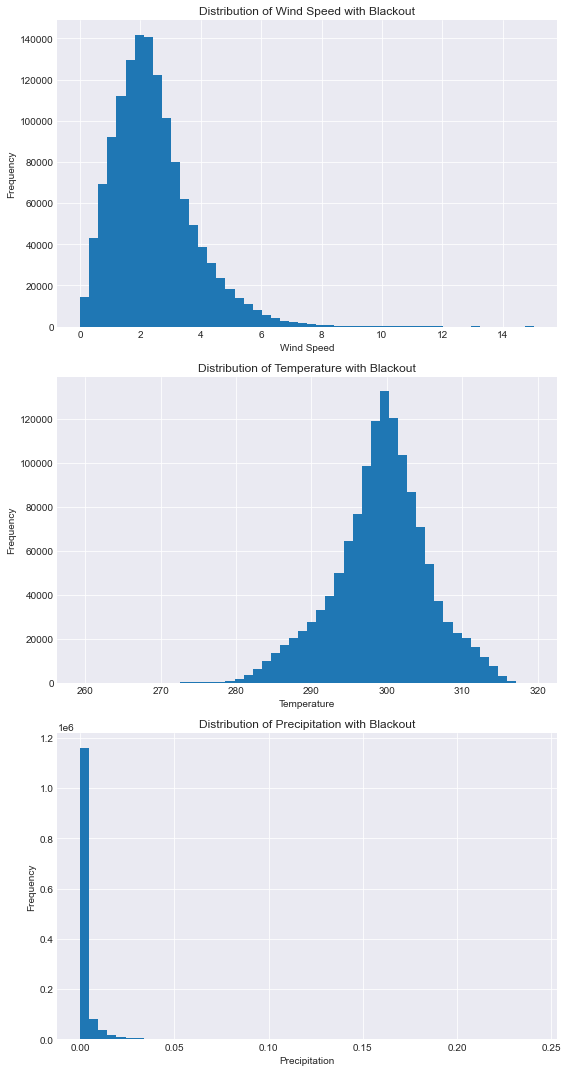

In [32]:

fig, axs = plt.subplots(3, 1, figsize=(8, 15))

df_final_blackout['wind_speed'].hist(bins=50, ax=axs[0])
axs[0].set_title('Distribution of Wind Speed with Blackout')
axs[0].set_xlabel('Wind Speed')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

df_final_blackout['t2m'].hist(bins=50, ax=axs[1])
axs[1].set_title('Distribution of Temperature with Blackout')
axs[1].set_xlabel('Temperature')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

df_final_blackout['tp'].hist(bins=50, ax=axs[2])
axs[2].set_title('Distribution of Precipitation with Blackout')
axs[2].set_xlabel('Precipitation')
axs[2].set_ylabel('Frequency')
axs[2].grid(True)

plt.tight_layout()

plt.savefig('hist_wind_temperature_precipitation_blackout.png', dpi=600)

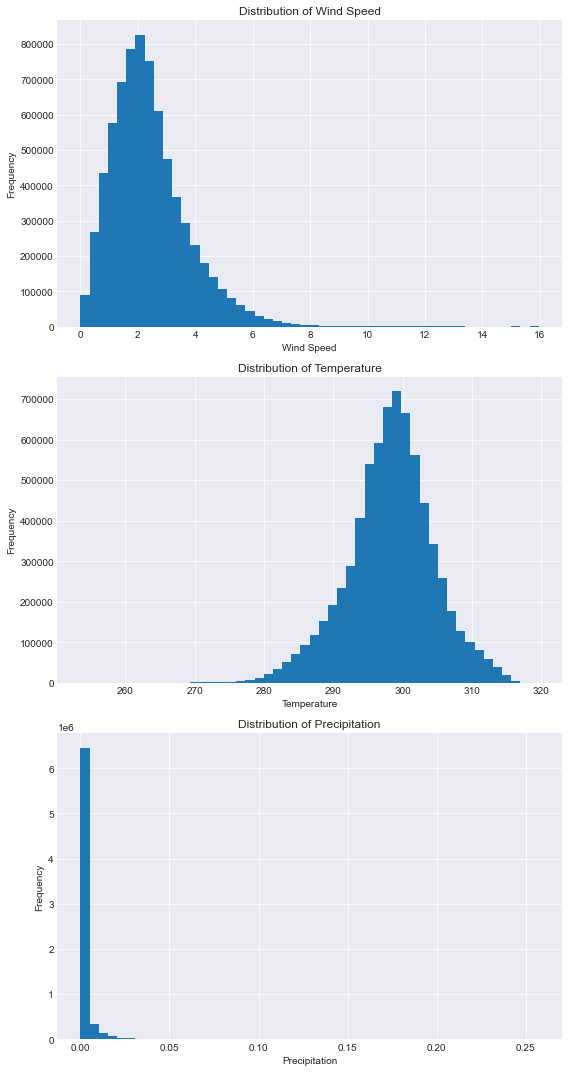

In [34]:
# same plot for all the data
# calculate the wind speed
df_final['wind_speed'] = np.sqrt(df_final['u10']**2 + df_final['v10']**2)

fig, axs = plt.subplots(3, 1, figsize=(8, 15))

df_final['wind_speed'].hist(bins=50, ax=axs[0])
axs[0].set_title('Distribution of Wind Speed')
axs[0].set_xlabel('Wind Speed')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

df_final['t2m'].hist(bins=50, ax=axs[1])
axs[1].set_title('Distribution of Temperature')
axs[1].set_xlabel('Temperature')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

df_final['tp'].hist(bins=50, ax=axs[2])
axs[2].set_title('Distribution of Precipitation')
axs[2].set_xlabel('Precipitation')
axs[2].set_ylabel('Frequency')
axs[2].grid(True)

plt.tight_layout()

plt.savefig('hist_wind_temperature_precipitation.png', dpi=600)


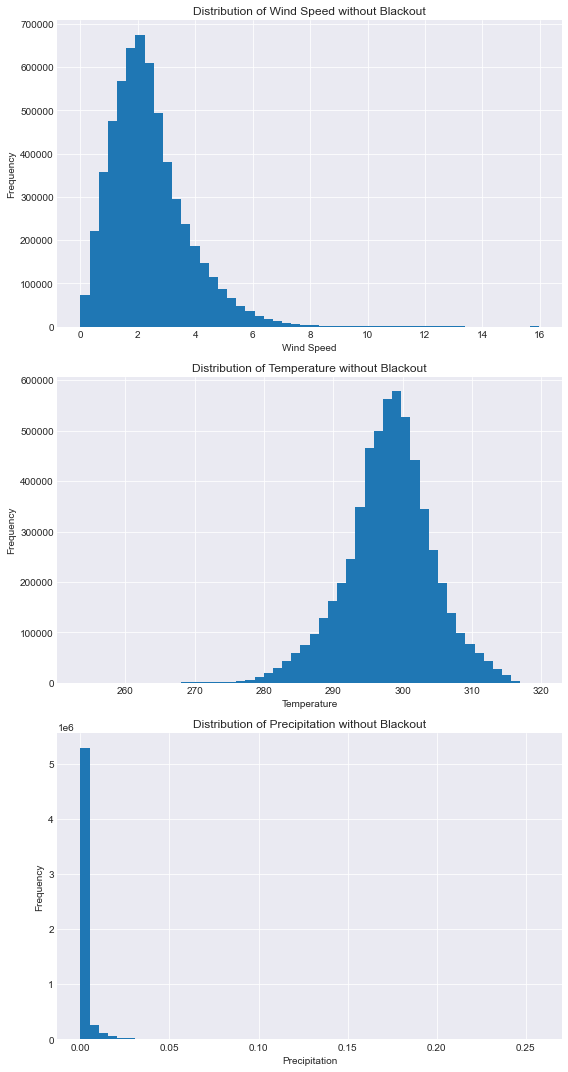

In [36]:
# plot the same for all the station without blackout

df_final_no_blackout = df_final[df_final['blackout'] == 0]

fig, axs = plt.subplots(3, 1, figsize=(8, 15))

df_final_no_blackout['wind_speed'].hist(bins=50, ax=axs[0])
axs[0].set_title('Distribution of Wind Speed without Blackout')
axs[0].set_xlabel('Wind Speed')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

df_final_no_blackout['t2m'].hist(bins=50, ax=axs[1])
axs[1].set_title('Distribution of Temperature without Blackout')
axs[1].set_xlabel('Temperature')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

df_final_no_blackout['tp'].hist(bins=50, ax=axs[2])
axs[2].set_title('Distribution of Precipitation without Blackout')
axs[2].set_xlabel('Precipitation')
axs[2].set_ylabel('Frequency')
axs[2].grid(True)

plt.tight_layout()

plt.savefig('hist_wind_temperature_precipitation_no_blackout.png', dpi=600)


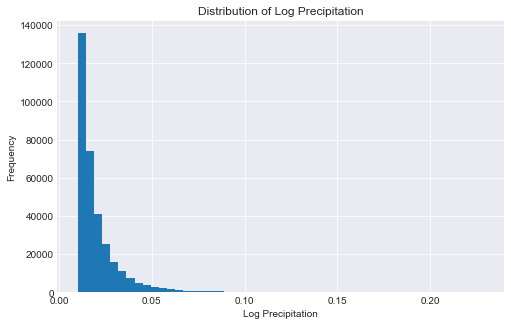

In [43]:
# log precipitation
# how to handle 0 precipitation
df_final['tp_log'] = np.log(df_final['tp'] + 1)
df_final_tpmorethan0 = df_final[df_final['tp_log'] > 0.01]

# plot the distribution of log precipitation
plt.figure(figsize=(8, 5))

df_final_tpmorethan0['tp_log'].hist(bins=50)
plt.title('Distribution of Log Precipitation')
plt.xlabel('Log Precipitation')
plt.ylabel('Frequency')
plt.grid(True)

plt.savefig('hist_log_precipitation.png', dpi=600)


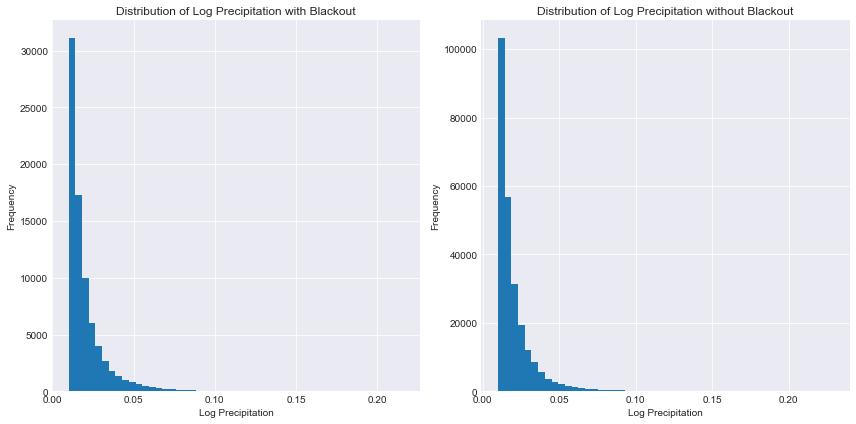

In [46]:
# make to side by side plot for data with blackout and without blackout, on log precipitation
# select the data with precipitation more than 0.01
df_final_tpmorethan0 = df_final[df_final['tp_log'] > 0.01]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

df_final_tpmorethan0[df_final_tpmorethan0['blackout'] == 1]['tp_log'].hist(
	bins=50, ax=axs[0])

axs[0].set_title('Distribution of Log Precipitation with Blackout')
axs[0].set_xlabel('Log Precipitation')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

df_final_tpmorethan0[df_final_tpmorethan0['blackout'] == 0]['tp_log'].hist(
	bins=50, ax=axs[1])

axs[1].set_title('Distribution of Log Precipitation without Blackout')
axs[1].set_xlabel('Log Precipitation')
axs[1].set_ylabel('Frequency')
axs[1].grid(True)

plt.tight_layout()


plt.savefig('hist_log_precipitation_blackout_no_blackout.png', dpi=600)


In [42]:

df_final_tpmorethan0.head()

,Unnamed: 0,datetime,Location name,ESMI_ID,District,State,Category,Connection Type,Lat,Lon,t2m,u10,v10,tp,date,time,station_id,pct_blackout,blackout,wind_speed,tp_log
0,0,2014-11-17 17:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,295.09723,-1.271197,-0.320305,5.645638e-04,20141117,1700,495,0.0,0,1.310930,5.644045e-04
2,2,2014-11-30 22:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,289.83447,-1.289795,-1.528702,4.351137e-07,20141130,2200,495,0.0,0,2.000125,4.351137e-07
3,3,2014-11-13 07:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,297.14110,-3.871719,0.472760,6.666072e-04,20141113,700,495,0.0,0,3.900476,6.663851e-04
4,4,2014-12-31 15:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,296.46838,-2.901352,0.717420,2.732359e-06,20141231,1500,495,0.0,0,2.988735,2.732355e-06
5,5,2014-12-28 20:00:00,Vijay Nagar,NaN,Hyderabad,Telangana,State Capital,Domestic,17.394295,78.451016,289.48932,-1.030703,-2.107422,8.544910e-07,20141228,2000,495,0.0,0,2.345970,8.544906e-07


In [15]:

geo_df = gpd.read_file('../../data/helper/STATION.geojson')


df_blackout_geo = pd.merge(df_final, geo_df, on='station_id', how='left')

df_blackout_geo.head()
df_blackout_geo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7280406 entries, 0 to 7280405
Data columns (total 28 columns):
 #   Column             Dtype   
---  ------             -----   
 0   Unnamed: 0         int64   
 1   datetime           object  
 2   Location name_x    object  
 3   ESMI_ID_x          float64 
 4   District           object  
 5   State              object  
 6   Category_x         object  
 7   Connection Type_x  object  
 8   Lat_x              float64 
 9   Lon_x              float64 
 10  t2m                float64 
 11  u10                float64 
 12  v10                float64 
 13  tp                 float64 
 14  date               int64   
 15  time               int64   
 16  station_id         int64   
 17  pct_blackout       float64 
 18  Location name_y    object  
 19  ESMI_ID_y          float64 
 20  Category_y         object  
 21  Connection Type_y  object  
 22  Lat_y              float64 
 23  Lon_y              float64 
 24  climate_zone_DN    float

In [14]:

# base map: india polygon
india_gdf = gpd.read_file(
    '../../data/helper/Indian_Climate_Zone(dissolved).geojson')

# Plot the station with the average blackout percentage as color on map
# calculate average blackout percentage by station
station_mid_blackout = df_blackout_geo.groupby(
	'station_id')['pct_blackout'].median()

station_mid_blackout.head()


station_id
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: pct_blackout, dtype: float64

In [ ]:

# merge the average blackout percentage with the geospatial data
geo_df = pd.merge(geo_df, station_avg_blackout, on='station_id', how='left')

In [7]:


# merge the average blackout percentage with the geospatial data
geo_df = pd.merge(geo_df, station_avg_blackout, on='station_id', how='left')


NameError: name 'geo_df' is not defined

In [ ]:
output_dir = '../../plots'
plt.style.use('seaborn-darkgrid')

# correlation matrix
correlation_matrix = df_final.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix')

plt.savefig(os.path.join(output_dir, 'correlation_matrix_final.png'), dpi=600)

In [2]:
# fit ARDL model
import statsmodels.api as sm
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.api import VARMAX

# fit ARDL model
# define the model
# set endog, exog
# endog: pct_blackout
# exog: wind_speed, t2m, tp_log
# set lags = 1

# check the amount of exog where is n/a
# calculate the wind_speed, the square root of u10^2 + v10^2
df_final['wind_speed'] = np.sqrt(df_final['u10']**2 + df_final['v10']**2)
df_final[['wind_speed', 't2m', 'tp']].isnull().sum()

# drop the rows where exog is n/a
df_final_notna = df_final.copy().dropna(subset=['wind_speed', 't2m', 'tp'])


NameError: name 'np' is not defined

In [64]:


model = ARDL(df_final_notna[['pct_blackout']],
             exog=df_final_notna[['wind_speed', 't2m', 'tp']], lags=1)

model_fit = model.fit()

/Users/rainylty/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [1]:
# print the summary
print(model_fit.summary())

# save the summary


NameError: name 'model_fit' is not defined